In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd

В этот раз поработаем с задачей регрессии. Используем выборку из датасета UMDFaces - http://umdfaces.io/

Загрузим архив с фотографиями и аннтоации к ним: 

In [48]:
!gdown https://drive.google.com/uc?id=1hBif59-_7cNOWIR7QKqqHj2k3G2WYBRB

Downloading...
From: https://drive.google.com/uc?id=1hBif59-_7cNOWIR7QKqqHj2k3G2WYBRB
To: /content/umdf.zip
1.67GB [00:18, 89.3MB/s]


In [24]:
!gdown https://drive.google.com/uc?id=1kmpKxE_AuDUleaq4T4r8hU8Ip0ux5ctV

Downloading...
From: https://drive.google.com/uc?id=1kmpKxE_AuDUleaq4T4r8hU8Ip0ux5ctV
To: /content/umdf.csv
7.56MB [00:00, 46.3MB/s]


In [36]:
!gdown https://drive.google.com/uc?id=1L_psbKV5cJc06loyHs_Kqv9dyyacrS2H

Downloading...
From: https://drive.google.com/uc?id=1L_psbKV5cJc06loyHs_Kqv9dyyacrS2H
To: /content/umdf_test.zip
100% 904k/904k [00:00<00:00, 56.9MB/s]


In [0]:
umdf = pd.read_csv('umdf.csv')

In [70]:
umdf.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'FILE', 'FD_SCORE', 'UF_SCORE', 'FACE_X',
       'FACE_Y', 'FACE_WIDTH', 'FACE_HEIGHT', 'YAW', 'PITCH', 'ROLL', 'P1X',
       'P1Y', 'VIS1', 'P2X', 'P2Y', 'VIS2', 'P3X', 'P3Y', 'VIS3', 'P4X', 'P4Y',
       'VIS4', 'P5X', 'P5Y', 'VIS5', 'P6X', 'P6Y', 'VIS6', 'P7X', 'P7Y',
       'VIS7', 'P8X', 'P8Y', 'VIS8', 'P9X', 'P9Y', 'VIS9', 'P10X', 'P10Y',
       'VIS10', 'P11X', 'P11Y', 'VIS11', 'P12X', 'P12Y', 'VIS12', 'P13X',
       'P13Y', 'VIS13', 'P14X', 'P14Y', 'VIS14', 'P15X', 'P15Y', 'VIS15',
       'P16X', 'P16Y', 'VIS16', 'P17X', 'P17Y', 'VIS17', 'P18X', 'P18Y',
       'VIS18', 'P19X', 'P19Y', 'VIS19', 'P20X', 'P20Y', 'VIS20', 'P21X',
       'P21Y', 'VIS21', 'PR_MALE', 'PR_FEMALE', 'BB_X1', 'BB_Y1', 'BB_X2',
       'BB_Y2', 'fullname', 'pts'],
      dtype='object')

In [26]:
umdf.head()

,Unnamed: 0,SUBJECT_ID,FILE,FD_SCORE,UF_SCORE,FACE_X,FACE_Y,FACE_WIDTH,FACE_HEIGHT,YAW,...,P19Y,VIS19,P20X,P20Y,VIS20,P21X,P21Y,VIS21,PR_MALE,PR_FEMALE
0,51467,2242,lyle_waggoner/lyle_waggoner_0008.jpg,2.40250,0.999697,68.78073,190.8959,212.14284,198.5532,-22.0,...,320.234,1.000370,224.096,316.736,0.833978,190.768,372.903,0.814374,0.768911,0.231089
1,70325,3104,samantha_bond/samantha_bond_0015.jpg,1.52571,0.999180,131.34070,80.1015,103.67160,94.3500,29.0,...,141.504,0.972514,185.984,137.803,0.967751,174.361,166.589,0.621092,0.312778,0.687222
2,48542,2115,leonard_cohen/leonard_cohen_0041.jpg,3.56270,0.959984,395.56900,275.1741,412.11600,403.6548,6.0,...,526.097,0.963836,657.843,518.480,0.972425,607.224,645.191,0.405223,0.725186,0.274814
3,76499,3376,tavi_gevinson/tavi_gevinson_0023.jpg,1.95023,0.990141,194.69230,264.5453,244.01640,221.8164,3.0,...,413.200,0.999826,347.229,410.797,1.014500,313.337,467.877,0.743621,0.227580,0.772420
4,74242,3269,spencer_boldman/spencer_boldman_0025.jpg,3.03945,0.999929,103.52540,121.6165,227.75520,211.0620,27.0,...,258.364,0.999841,213.756,255.085,1.000970,191.404,315.090,0.809986,0.580592,0.419408


In [0]:
umdf['fullname'] = '/content/umdf/'+umdf['FILE'].str.split('/').str[1]

In [0]:
umdf

In [0]:
!unzip -o umdf.zip -d umdf/

## Точки

In [0]:
def get_pts(row):
    pts = torch.tensor([[row['P8Y'], row['P8X']],
                        [row['P11Y'], row['P11X']]])
    return pts

In [0]:
umdf['pts'] = umdf.apply(get_pts,axis=1)

In [0]:
data = (PointsItemList.from_df(umdf, path='/content/umdf/', folder=None, cols='image_name')
        .split_by_rand_pct(0.2, seed=1)
        .label_from_df(cols='pts')
        .transform(tfms=get_transforms(), tfm_y=True, size=224, resize_method = ResizeMethod.SQUISH, remove_out=False)
        .databunch(bs=64).normalize(imagenet_stats)
       )

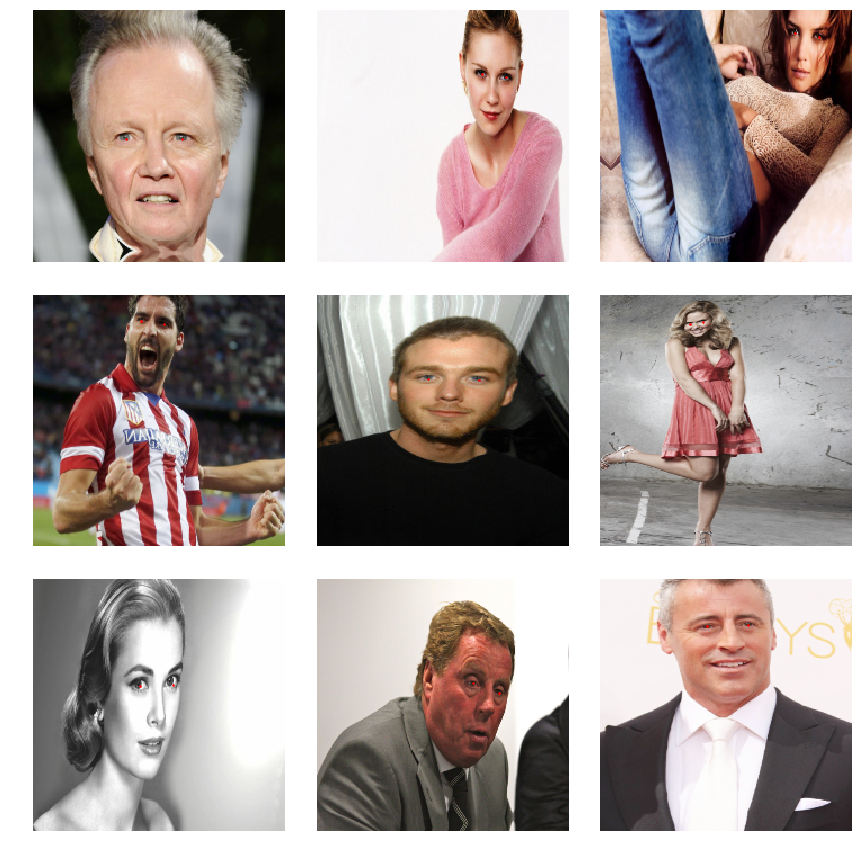

In [97]:
data.show_batch(rows=3)

In [0]:
arch = models.resnet34
learn = cnn_learner(data, arch)

In [0]:
learn.lr_find()
learn.recorder.plot()

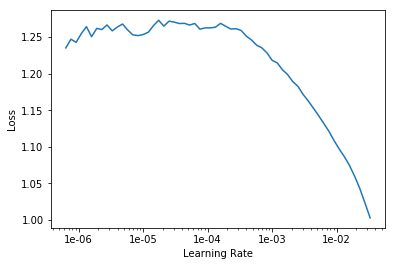

In [110]:
learn.recorder.plot()

In [111]:
learn.fit_one_cycle(1, slice(1e-2))

epoch,train_loss,valid_loss,time
0,0.124319,0.040589,05:38


In [113]:
learn.fit_one_cycle(1, slice(1e-2))

epoch,train_loss,valid_loss,time
0,0.061032,0.039277,05:34


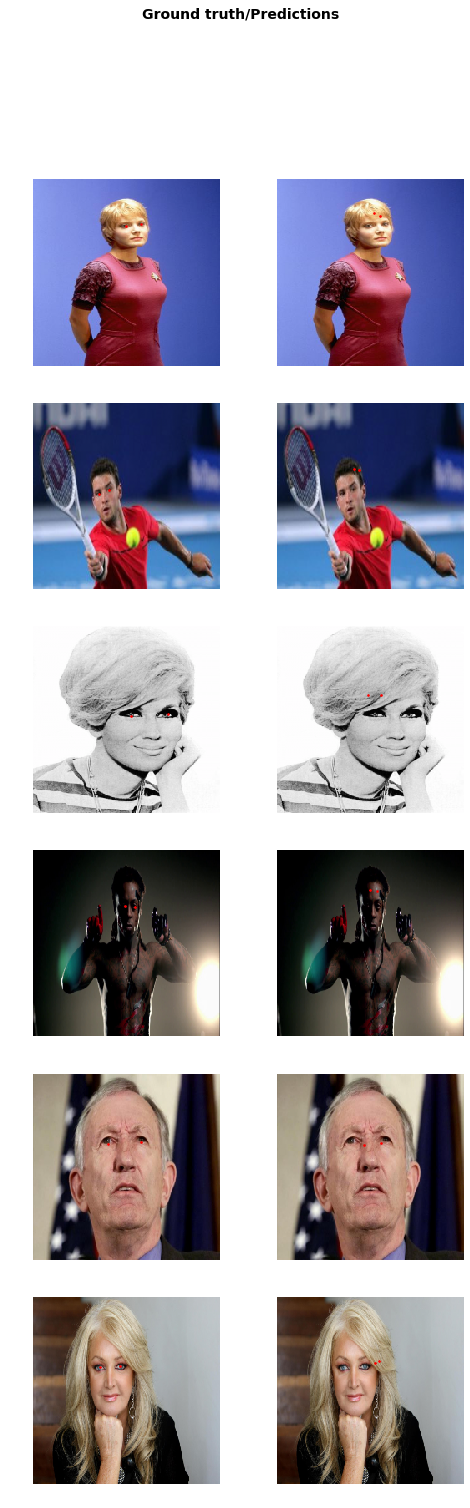

In [114]:
learn.show_results(rows=6)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()
learn.recorder.plot()

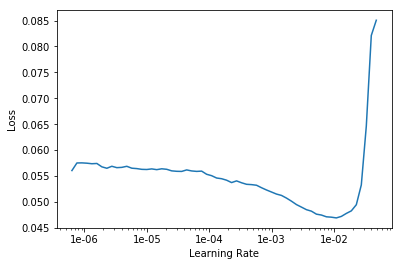

In [118]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-3))

epoch,train_loss,valid_loss,time


## BBox

In [0]:
umdf['BB_X1'] = umdf['FACE_X'] 
umdf['BB_Y1'] = umdf['FACE_Y'] 
umdf['BB_X2'] = umdf['FACE_X'] + umdf['FACE_WIDTH']
umdf['BB_Y2'] = umdf['FACE_Y'] + umdf['FACE_HEIGHT']

In [0]:
bb_dict = {a: [[b],['face']] for a, b in zip(umdf['fullname'].values, 
                                           umdf[['BB_Y1','BB_X1','BB_Y2','BB_X2']].values)}

In [0]:
bb_dict

In [0]:
get_y_func = lambda x: bb_dict[x]

In [0]:
class StubbedObjectCategoryList(ObjectCategoryList):
    def analyze_pred(self, pred): return [pred.unsqueeze(0), torch.ones(1).long()]

In [0]:
umdf['image_name'] = umdf['FILE'].str.split('/').str[1]

In [0]:
data = (ObjectItemList.from_df(umdf, path='/content/umdf/', folder=None, cols='image_name')
        .split_by_rand_pct(0.2, seed=1)                         
        .label_from_func(get_y_func, label_cls=StubbedObjectCategoryList)
        .transform(get_transforms(), tfm_y=True, size=224, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=64, collate_fn=bb_pad_collate)
        .normalize(imagenet_stats))

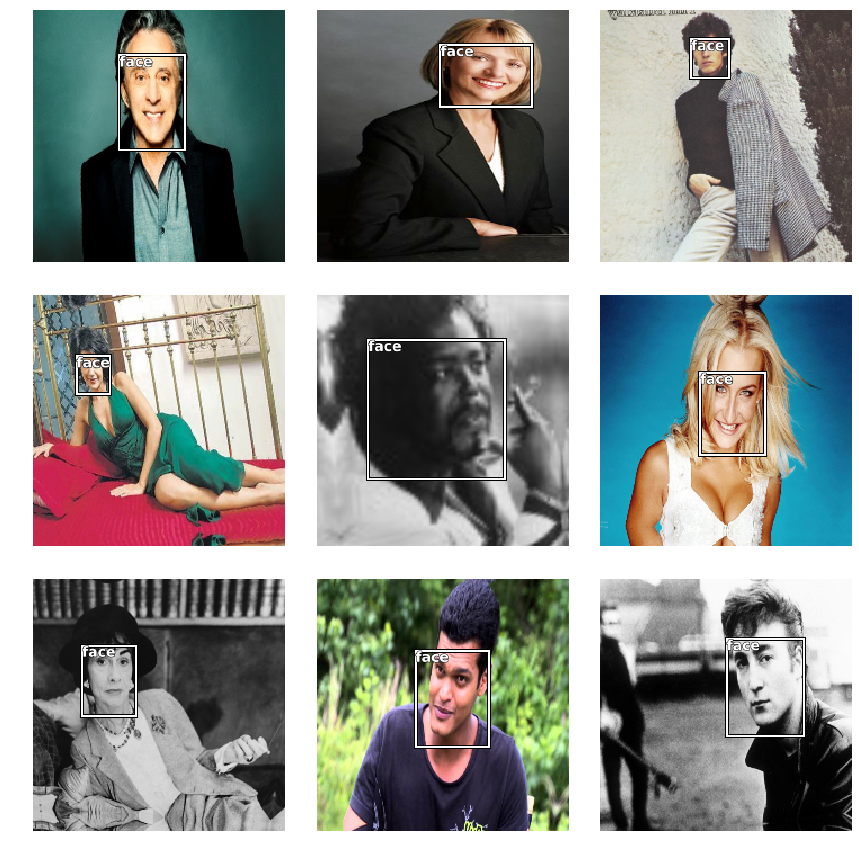

In [83]:
data.show_batch(rows=3)

In [0]:
from fastai.callbacks import num_features_model

class FaceDetector(nn.Module):
    def __init__(self, arch=models.resnet18):
        super().__init__() 
        self.cnn = create_body(arch)
        self.head = create_head(num_features_model(self.cnn) * 2, 4)
        
    def forward(self, im):
        x = self.cnn(im)
        x = self.head(x)
        return 2 * (x.sigmoid_() - 0.5)

In [0]:
body = create_body(models.resnet34)

In [109]:
create_head(num_features_model(body) * 2, 4)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU(inplace)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5)
  (8): Linear(in_features=512, out_features=4, bias=True)
)

In [0]:
from torch.nn import L1Loss

def loss_fn(preds, targs, class_idxs):
    return L1Loss()(preds, targs.squeeze())

In [0]:
learn = Learner(data, FaceDetector(arch=models.resnet34), loss_func=loss_fn)

In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


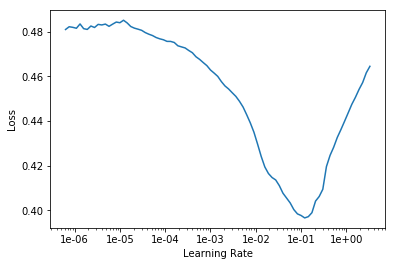

In [92]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, slice(1e-2))

In [0]:
learn.show_results(rows=6)